In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import multiprocessing
from item.item_list import (
    ItemList,
    Item
)
from nlp.utils import (
    plot_histogram,
    get_completetext,
    plot_wordcloud,
    print_statistics,
    groups_frequency_sort)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_unigram_groups,
    get_two_tokens_groups,
    get_first_token_groups,
    get_bigram_groups,
    get_first_two_groups,
    groups_frequency_sort
)
from nlp.pos_tagging import (
    get_tokens_tags
)
from nlp.word_embeddings import (
    load_word_embeddings,
    get_item_embedding,
    get_items_embeddings,
    get_items_similarities,
    normalize
)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
itemlist = ItemList()
itemlist.load_items_from_file('../dados/items_preprocessed.zip', just_words=True)

In [95]:
itemlist.size

1508992

In [5]:
import os
#file = './results/baseline+embeddings/initial_tests/embeddings-norm50_SUB+MED_hdbscan.pkl'
#a_file = open(file, "rb")
#output = pickle.load(a_file)
#df_results = pd.read_csv('./results/tcu/saida_hdbscan_emb50_samp100_size30_dimfull_N_MED.csv',sep=';')
df_results = pd.read_pickle('./results/tcu/saida_hdbscan_emb50_samp05_size30_dimfull_ALL_TAGS.csv')
df_results.head()

,first_token,cluster_id,item_id,description,original_description
0,None,4361,0,[colagenase],None
1,None,9342,1,"[campo, operatorio]",None
2,None,-1,2,"[kit, pet]",None
3,None,-1,3,"[tinta, relevo, tecido, bran]",None
4,None,-1,4,"[termometro, clinico, digital, portatil, tempe...",None


In [97]:
df_results.shape

(1508992, 5)

In [98]:
from collections import defaultdict
output = defaultdict(list)
output_desc = defaultdict(list)
for cluster,item_id,desc in zip(df_results.cluster_id,df_results.item_id,df_results.description):
    output[cluster].append(item_id)
    output_desc[cluster].append(desc)
#output[0]
#output = {cluster:desc for x,y in zip(df_results.cluster,df_results.item_id)}

In [99]:
len(output)

9643

In [68]:
count = 0
for cluster, items in output.items():
    if cluster == -1:
        count += len(items)        
count

563119

In [70]:
group_size = {}
groups_sizes_list = []

for group, items in output.items():
    if group != -1:
        group_size[group] = len(items)
        groups_sizes_list.append(len(items))

In [71]:
sorted(group_size.items(), key=lambda tup : tup[1],reverse=True)[:10]

[(9628, 25886),
 (2528, 7329),
 (9557, 2688),
 (4856, 2437),
 (1631, 2418),
 (7673, 2320),
 (8885, 2145),
 (3401, 2113),
 (94, 1866),
 (906, 1823)]

In [75]:
itemlist.get_group_items(output[9628])

[['pradaxa', 'c30'],
 ['rivaroxaban'],
 ['tensfes'],
 ['cariostatico'],
 ['levomepromazina', 'comprim'],
 ['vertizine'],
 ['neutrofer'],
 ['oxcarbamazepina'],
 ['yomax'],
 ['predinisona'],
 ['secnidazol'],
 ['acebrofilina'],
 ['levofloxacino'],
 ['desensibilizador'],
 ['deflazacort'],
 ['creatino', 'fosfoquinase', 'ckmb'],
 [],
 ['janumet'],
 ['tenoxizan'],
 ['fluconozol'],
 ['digiflex'],
 ['cloxazolam'],
 ['dorene'],
 ['cinarizina'],
 ['ripao'],
 ['sinfonada'],
 ['norfloxacino'],
 ['ambroxol'],
 ['condulete'],
 ['sinfonada'],
 ['levomepromazina'],
 ['hidrocortizona'],
 ['cilostazol'],
 ['pregomin', 'pepti'],
 ['captropil'],
 ['nesina'],
 ['item1059'],
 ['apidra'],
 ['anlodipino'],
 ['rebomassa'],
 ['percalux'],
 ['ambroxol'],
 ['esomeprasol'],
 ['clonazepan'],
 ['colagenaze', 'cloranf'],
 ['respiridona'],
 ['levomepromazina'],
 ['micropore'],
 ['eixovirabrequim'],
 ['ramipril'],
 ['clexane'],
 ['esfignomanometro'],
 ['limatao'],
 ['noripurum', 'ferripolimaltose'],
 ['neurontim'],
 ['a

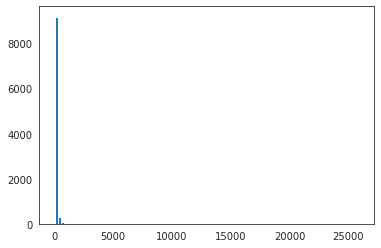

In [76]:
groups_sizes_list.count(0)
a = plt.hist(groups_sizes_list,bins=100)

In [77]:
groups_names_size = groups_frequency_sort(group_size)

In [78]:
groups_names_size[:10]

[(9628, 25886),
 (2528, 7329),
 (9557, 2688),
 (4856, 2437),
 (1631, 2418),
 (7673, 2320),
 (8885, 2145),
 (3401, 2113),
 (94, 1866),
 (906, 1823)]

In [79]:
items_group_size = []

for group_size in groups_sizes_list:
    for i in range(group_size):
        items_group_size.append(group_size)

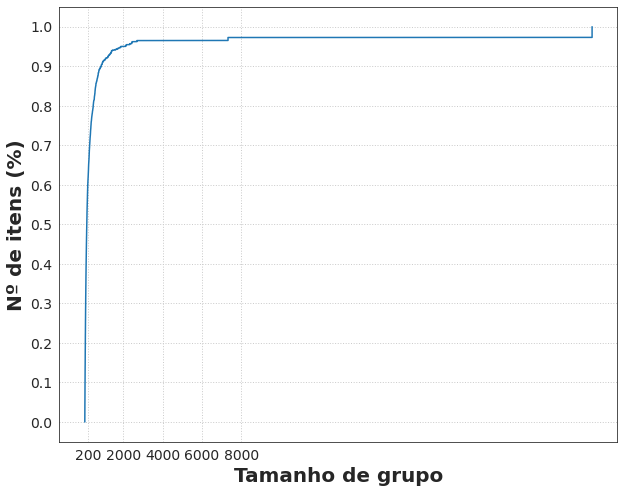

<Figure size 432x288 with 0 Axes>

In [80]:
from statsmodels.distributions.empirical_distribution import ECDF

# fit a cdf
ecdf = ECDF(items_group_size)

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Tamanho de grupo'
y_label = 'Nº de itens (%)'


# kwargs = {'cumulative': True}
# sns.distplot(vlr_recurso, hist_kws=kwargs, kde_kws=kwargs)
plt.plot(ecdf.x, ecdf.y)

axis1.set_xticks([200, 2000, 4000, 6000, 8000, ])
axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

In [81]:
print_statistics(groups_sizes_list)

Mean: 98.09925326695706
First quartile: 40.0
Median: 57.0
Third quartile: 96.0
Std: 302.6615648184613
Var: 91604.02281835963
Max: 25886
Min: 30.0


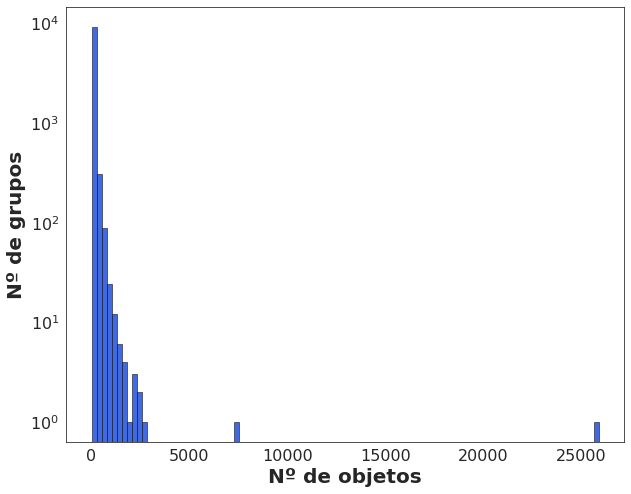

<Figure size 432x288 with 0 Axes>

In [82]:
plot_histogram(groups_sizes_list, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [83]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,2000]'] = 0
count_interval['(2000,4000]'] = 0
count_interval['(4000,6000]'] = 0
count_interval['>6000'] = 0

In [84]:
for p in groups_sizes_list:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 2000:
        count_interval['(1000,2000]'] += 1
    elif p > 2000 and p <= 4000:
        count_interval['(2000,4000]'] += 1
    elif p > 4000 and p <= 6000:
        count_interval['(4000,6000]'] += 1
    else:
        count_interval['>6000'] += 1

In [85]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value)
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

1 : 0
(1,5] : 0
(5,10] : 0
(10,100] : 7389
(100,1000] : 2220
(1000,2000] : 25
(2000,4000] : 6
(4000,6000] : 0
>6000 : 2


In [86]:
intervals_df = pd.DataFrame(lines, columns=["size"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9642 entries, 0 to 9641
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   size    9642 non-null   object
dtypes: object(1)
memory usage: 75.5+ KB


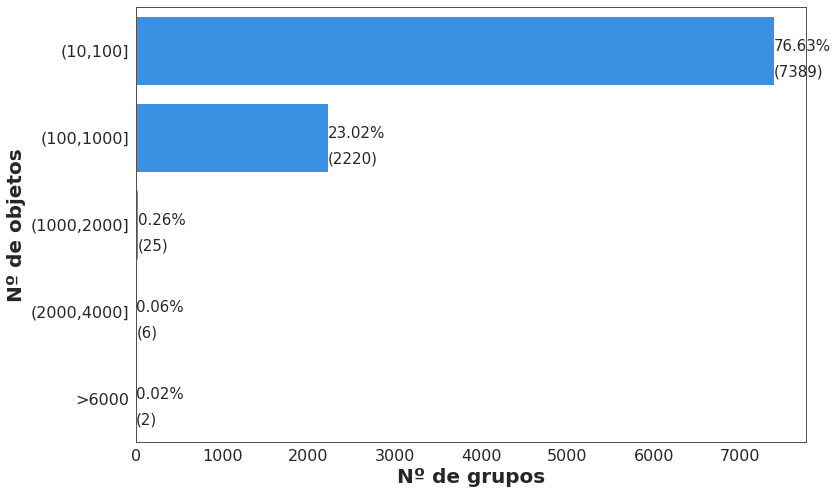

<Figure size 432x288 with 0 Axes>

In [87]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="size", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [26]:
groups_sample = {}

for group, items in output.items():
    first_token = group.split('_')
    if first_token[0] == 'seringa':
        groups_sample[group] = items

AttributeError: 'int' object has no attribute 'split'

In [27]:
len(groups_sample)

0

In [177]:
size = 1000

for group, items in groups_sample.items():
#     sample = random.sample(items, min(10, len(items)))
#     for id_ in sample:
#         print(itemlist.items_list[id_])
    sample = items
    if len(items) > size:
        print('*********************')
        print(group)
        print(len(sample))
        for id_ in sample:
            print(itemlist.items_list[id_])

*********************
seringa_0
2403
['seringa', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'agulha']
['seringa', 'agulha']
['seringa', 'agulha']
['seringa', 'desc', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'desc', 'agulha']
['seringa', 'agulha']
['seringa', 'desc', 'agulha']
['seringa', 'agulha']
['seringa', 'desc', 'agulha']
['seringa', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'desc', 'agulha']
['seringa', 'agulha']
['seringa', 'descartavel', 'agulha', 'und']
['seringa', 'descartavel', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'agulha']
['seringa', 'agulha']
['seringa', 'agulha']
['seringa', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'descartavel', 'agulha']
['seringa', 'agulha']
['seringa', 'desc', 'agulha']
['seringa', 'agulha', 'descer']
['seringa', 'descartavel', 'agulha']
['seringa', 'desc', 'agulha']

['seringa', 'descartavel']
['seringa', 'desc', 'ag']
['seringa', 'carpule']
['seringa', 'descartavel']
['seringa', 'desc', 'ag']
['seringa', 'descartavel', 'agu']
['seringa', 'hipodermico']
['seringa', 'descartavel']
['seringa', 'ag']
['seringa']
['seringa', 'descartavel']
['seringa', 'carpule']
['seringa', 'despir', 'seg']
['seringa', 'seringa']
['seringa', 'desc']
['seringa', 'luer', 'slip', 'serin']
['seringa']
['seringa']
['seringa', 'agulhar', 'und']
['seringa', 'carpule']
['seringa', 'descartavel', 'slip']
['seringa', 'triplice', 'equipar', 'odontologico']
['seringa', 'descartavel']
['seringa', 'descartavel', 'epp']
['seringa', 'luer', 'lock', 'serin']
['seringa']
['seringa', 'descart']
['seringa']
['seringa', 'descartavel']
['seringa', 'descartavel']
['seringa', 'descart']
['seringa', 'carpule']
['seringa', 'triplice']
['seringa']
['seringa', 'ag']
['seringa']
['seringa', 'desc', 'ag']
['seringa', 'desc']
['seringa']
['seringa']
['seringa', 'desc', 'ag']
['seringa', 'de', 'ag']


['seringa', 'apresentar', 'maior', 'resistencia', 'desgaste', 'resistente', 'dureza', 'compressao', 'fratura', 'imitar', 'estrutura', 'dental', 'sistema', 'simplificar', 'total', 'utilizado', 'dia', 'fluorescencia', 'otimo', 'resu']
['seringa', 'agulha', 'descartavel', 'produto', 'medico', 'uso', 'unico', 'esteril', 'atoxicar', 'apirogenica', 'esterilizado']
['seringa', 'graduado', 'agulha', 'individual', 'esteril', 'bico', 'slip', 'contender', 'lote', 'data', 'fabricacao', 'vencimento', 'reg']
['seringa', 'descartavel', 'agulha', 'confeccionada', 'polipropileno', 'atoxicar', 'apirogenica', 'cilindro', 'escala', 'graduacao', 'visivel', 'anel', 'retencao', 'falange', 'formato', 'adequado', 'embolo', 'pistao', 'lubrificar', 'esteril', 'embalado', 'papel', 'grau', 'cirurgico', 'bico', 'ponta', 'cateter']
['seringa', 'descartavel', 'agulha', 'confeccionada', 'polipropileno', 'transparente', 'atoxicar', 'graduacao', 'externar', 'milimetrada', 'bico', 'slip', 'localizacao', 'central', 'embol

In [ ]:
output

In [ ]:
#  word embeddings file, each line contains an embedding
word_embeddings_file = '../../../embeddings/cbow_s50.txt'

In [ ]:
# read word embeddings from file and store them in a map
word_embeddings = load_word_embeddings(word_embeddings_file)

In [ ]:
# Get the tags of tokens descriptions
word_class = get_tokens_tags()

In [ ]:
# Build the vector representation for an item using the word embeddings
item_embedding = get_items_embeddings(itemlist.items_list, word_embeddings, word_class, embedding_type=['N', 'MED'], type='list')

In [ ]:
item_embedding = normalize(item_embedding)

In [ ]:
del itemlist
del word_class
del word_embeddings

In [ ]:
def get_ranges(group_len, n_threads):
    total_len = group_len
    num_threads = n_threads
    lower = []
    upper = []
    step = int(total_len/num_threads)

    for k in range(num_threads):
        lower.append(0)
        upper.append(0)

    lower[0] = 0
    upper[0] = step

    i = 1
    j = 0
    while (i < num_threads):
        upper[i]  = upper[j] + step
        lower[i]  = upper[j] +  1
        if(i%2 != 0):
            upper[i] = upper[i] + 1

        i = i + 1
        j = j + 1

    upper[n_threads - 1] = upper[n_threads - 1] - 6
    return lower, upper


In [ ]:
def get_intra_clusters_similarities(item_embedding, groups, it_thread, lower,
                                    upper, Result):

    print(it_thread)

    # It creates a list of the the keys of these groups:
    group_name = list(groups.keys())
    # It gets the values of each group (i.e., the ids of the descriptions into that group):
    group_descriptions = list(groups.values())

    # Iterator of the first token groups:
    ft_it = lower
    
    intra_cluster_similarity = {}
    
    while ft_it <= upper:

        if len(group_descriptions[ft_it]) == 1:
            intra_cluster_similarity[group_name[ft_it]] = {'mean': 1.0, 'min': 1.0} 
        else:
            similarities = get_items_similarities(group_descriptions[ft_it], item_embedding)
            similarity_values = []
            for item, similarity_list in similarities.items():
                for s in similarity_list:
                    similarity_values.append(s[1])
                    
            similarity_values = [x for x in similarity_values if math.isnan(x) == False]
            if len(similarity_values) > 1:
                intra_cluster_similarity[group_name[ft_it]] = {'mean': np.mean(similarity_values), 'min': np.min(similarity_values)}
            else:
                intra_cluster_similarity[group_name[ft_it]] = {'mean': 0.0, 'min': 0.0}
                
        ft_it = ft_it + 1

    Result[it_thread] = intra_cluster_similarity

In [ ]:
group_len = len(output)
groups_new = {}
keys_ft = list(output.keys())
random.shuffle(keys_ft)
random.shuffle(keys_ft)

for k in keys_ft:
    groups_new[k] = output[k]

In [ ]:
manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
n_threads = 19

In [ ]:
# It defines the ranges (of the groups) the threads will work on:
thread_ranges = get_ranges(group_len, n_threads)
print('Read ranges')
print(thread_ranges)

In [ ]:
for i in range(n_threads):
    p = multiprocessing.Process(target=get_intra_clusters_similarities,
    args = (item_embedding, groups_new, i, thread_ranges[0][i], thread_ranges[1][i], \
            return_dict))
    jobs.append(p)
    p.start()

In [ ]:
for proc in jobs:
    proc.join()

In [ ]:
dictionary_clusters = {}
for i in range(n_threads):
    dictionary_clusters.update(return_dict[i])

In [ ]:
a_file = open("./results/baseline+embeddings/intra_similarity_norm50_SUB+MED_hdbscan.pkl", "wb")
pickle.dump(dictionary_clusters, a_file)
a_file.close()

In [ ]:
dictionary_clusters

In [ ]:
# Build the vector representation for an item using the word embeddings
items_embeddings = get_items_embeddings(itemlist.items_list, word_embeddings, word_class, embedding_type=['N', 'MED'], type='list')

In [ ]:
items_embeddings = normalize(items_embeddings)

In [ ]:
import umap

reducer = umap.UMAP(metric='euclidean', verbose=True, low_memory=True)
embeddings = reducer.fit_transform(np.array(items_embeddings[:30000]))

In [ ]:
embeddings[:10]

In [ ]:
item_group = {}
id_ = 0

for group, items in output.items():
    print(group)
    for item in items:
        item_group[item] = id_
    id_ += 1

In [ ]:
len(item_group)

In [ ]:
count = 0
labels = []
size = len(embeddings)
group_id = {}
id_ = 0

for i in range(size):
    try:
        if item_group[i] not in group_id:
            group_id[item_group[i]] = id_
            id_ += 1
        labels.append(group_id[item_group[i]])
    except:
        count += 1
        labels.append(0)
        
count

In [ ]:
len(group_id)

In [ ]:
len(labels)

In [ ]:
labels[:10]

In [ ]:
labels.count(0)

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.array(labels).astype(int), s = 50)
plt.xlabel("Component1", fontsize = 20)
plt.ylabel("Component2", fontsize = 20)
plt.show()

#### reconstruindo representacao

In [8]:
unique_tokens = set([x for desc in df_results.description for x in desc ])
word_embeddings = load_word_embeddings('../../../embeddings/word2vec/cbow_s50.txt',words_set=unique_tokens)

umap_file = open('./results/tcu/reduced_dim_items_preprocessed','rb')
umap = pickle.load(umap_file)
umap_file.close()

word_class = get_tokens_tags(words_set=unique_tokens)

items_embeddings = get_items_embeddings_weighted(df_results.description, word_embeddings
                                                        , word_class,embedding_type=None)


In [9]:
itens_reduced = umap.transform(items_embeddings)

	completed  0  /  30 epochs
	completed  3  /  30 epochs
	completed  6  /  30 epochs
	completed  9  /  30 epochs
	completed  12  /  30 epochs
	completed  15  /  30 epochs
	completed  18  /  30 epochs
	completed  21  /  30 epochs
	completed  24  /  30 epochs
	completed  27  /  30 epochs


In [ ]:
dim_cols =[]
for i in range(15):
    df_results['dim_'+str(i)] = np.zeros(df_results.shape[0])
    dim_cols.append('dim_'+str(i))

df_results[dim_cols] = np.array(itens_reduced)
df_results.head()

In [139]:
df_results=df_results.rename(columns={'first_token':'primeiro_token'
                                      ,'cluster_id':'id_cluster'
                                      , 'item_id':'id_item'
                                      ,'description':'desc_usada_no_agrupamento'
                                     ,'original_description':'desc_original'})
df_results['primeiro_token'] = '-999'

df_results.head()

,primeiro_token,id_cluster,id_item,desc_usada_no_agrupamento,desc_original,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14
0,-999,4361,0,[colagenase],None,6.824154,2.740593,4.655080,4.744723,1.288791,4.555739,4.710547,6.453825,10.522768,2.347898,5.207557,3.096163,0.985914,1.338683,7.016582
1,-999,9342,1,"[campo, operatorio]",None,5.936692,-0.152521,6.041902,1.373315,3.831659,8.937923,4.268080,6.101715,2.815681,5.623752,1.795642,6.033234,-0.509555,-0.878794,8.380254
2,-999,-1,2,"[kit, pet]",None,3.886943,-0.154838,0.567067,2.752814,4.081202,6.281321,1.953035,8.545024,1.359515,7.242692,0.982284,1.593426,5.610947,4.361241,1.737147
3,-999,-1,3,"[tinta, relevo, tecido, bran]",None,6.183677,-0.136010,3.461776,-0.413813,4.262051,1.280894,0.986893,4.481933,4.221141,6.183562,8.289201,-1.119871,6.217292,8.072784,1.947601
4,-999,-1,4,"[termometro, clinico, digital, portatil, tempe...",None,4.241377,1.642976,3.890330,3.323693,3.494295,5.043996,4.633183,5.130083,5.550138,5.301176,4.025199,3.730655,4.790668,4.652860,4.003792


In [2]:
df_results.head(1000).to_csv('./results/tcu/amostra_robson.csv',sep=";",index=None)

NameError: name 'df_results' is not defined

#### Gerando Métricas

In [135]:
from item.clustering.evaluate import (
    get_score_pickle,
    get_score,
    evaluate_results_pickle,
    evaluate_results
)

In [145]:
get_score(df_results, remove_outliers=True, score='silhouette', sample_size=0.2,
              metric='euclidean', norm=True)

-0.3665197829916371

In [148]:
evaluate_results(df_results, remove_outliers=True,
              metric='euclidean', norm=True)

TypeError: cannot unpack non-iterable int object

In [7]:
# Build the vector representation for an item using the word embeddings
def get_item_embedding_weighted(document, word_embeddings, word_class, embedding_type=None,
                       embedding_size=50):

    item_embedding = np.zeros(embedding_size)
    num_tokens = len(document)
    peso_acum = 0
    
    for pos,token in enumerate(document):
        if token in word_embeddings:
            if embedding_type == None:
                #media ponderada pela posicao
                #decresce linearmente                
                peso = 1/(pos+1)
                
                if token.isdigit():
                    #segundo a abordagem do tcu eles deixam os pesos de numeros em 
                    #3/4 da faixa de pesos
                    peso_digito = (1+(1/(len(document))))*(1/4)
                    item_embedding += peso_digito*np.array(word_embeddings[token])
                    peso_acum += peso_digito
                else:                
                    item_embedding += peso*np.array(word_embeddings[token])
                    peso_acum += peso
                    
            elif token in word_class and word_class[token] in set(embedding_type):
                
                peso = 1/(pos+1)
                
                if token.isdigit():
                    #segundo a abordagem do tcu eles deixam os pesos de numeros em 
                    #3/4 da faixa de pesos
                    peso_digito = (1+(1/(len(document))))*(1/4)
                    item_embedding += peso_digito*np.array(word_embeddings[token])
                    peso_acum += peso_digito
                else:  
                    item_embedding += peso*np.array(word_embeddings[token])
                    peso_acum += peso
                    
    if peso_acum != 0:
        item_embedding /= peso_acum

    return item_embedding


def get_items_embeddings_weighted(documents, word_embeddings, word_class, embedding_type=None,
                         embedding_size=50, type='list'):

    if type == 'list':
        documents_embeddings = []
    elif type == 'dict':
        documents_embeddings = {}

    id = 0
    for doc in documents:
        if type == 'list':
            documents_embeddings.append(list(get_item_embedding_weighted(doc, word_embeddings,
                                                    word_class, embedding_type
                                                    ,embedding_size)))
        elif type == 'dict':
            documents_embeddings[id] = list(get_item_embedding_weighted(doc, word_embeddings,
                                                    word_class, embedding_type
                                                    ,embedding_size))
        id += 1

    return documents_embeddings

